In [1]:
import pandas as pd
import os
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

import scipy

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

os.chdir("P:\Courses\MMA 823 - Financial Markets\Project")

In [2]:
df1=pd.read_csv("2014_Financial_Data.csv")
df2=pd.read_csv("2015_Financial_Data.csv")
df3=pd.read_csv("2016_Financial_Data.csv")
df4=pd.read_csv("2017_Financial_Data.csv")
df5=pd.read_csv("2018_Financial_Data.csv")

In [3]:
df1['Year']=2014
df2['Year']=2015
df3['Year']=2016
df4['Year']=2017
df5['Year']=2018

In [4]:
df1.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       '2015 PRICE VAR [%]', 'Class', 'Year'],
      dtype='object', length=226)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Columns: 226 entries, Unnamed: 0 to Year
dtypes: float64(222), int64(2), object(2)
memory usage: 6.6+ MB


In [6]:
df1.rename(columns={"2015 PRICE VAR [%]": "PRICE_VAR%", "Unnamed: 0": "Company_name"},inplace=True)
df2.rename(columns={"2016 PRICE VAR [%]": "PRICE_VAR%", "Unnamed: 0": "Company_name"},inplace=True)
df3.rename(columns={"2017 PRICE VAR [%]": "PRICE_VAR%", "Unnamed: 0": "Company_name"},inplace=True)
df4.rename(columns={"2018 PRICE VAR [%]": "PRICE_VAR%", "Unnamed: 0": "Company_name"},inplace=True)
df5.rename(columns={"2019 PRICE VAR [%]": "PRICE_VAR%", "Unnamed: 0": "Company_name"},inplace=True)


In [7]:
frames = [df1, df2, df3, df4, df5]

In [8]:
data = pd.concat(frames)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22077 entries, 0 to 4391
Columns: 226 entries, Company_name to Year
dtypes: float64(222), int64(2), object(2)
memory usage: 38.2+ MB


In [10]:
data.head()

,Company_name,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,PRICE_VAR%,Class,Year
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0,2014
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0,2014
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1,2014
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1,2014
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1,2014


In [11]:
# Data missing information 
#data_info=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
#data_info=data_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
#data_info=data_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.
#                         rename(index={0:'null values (%)'}))
#display(data_info)

In [12]:
data.dtypes

Company_name             object
Revenue                 float64
Revenue Growth          float64
Cost of Revenue         float64
Gross Profit            float64
                         ...   
SG&A Expenses Growth    float64
Sector                   object
PRICE_VAR%              float64
Class                     int64
Year                      int64
Length: 226, dtype: object

In [13]:
data.fillna(0,inplace=True)

In [14]:
# Data missing information 
#data_info1=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
#data_info1=data_info1.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
#data_info1=data_info1.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.
#                         rename(index={0:'null values (%)'}))
#display(data_info1)
data.isnull().sum().sum()

0

In [15]:
dummies = pd.get_dummies(data.Sector, dtype=np.int64)

In [16]:
data1 = pd.concat([data, dummies], axis=1)

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22077 entries, 0 to 4391
Columns: 237 entries, Company_name to Utilities
dtypes: float64(222), int64(13), object(2)
memory usage: 40.1+ MB


In [19]:
data1.drop('Sector', axis=1, inplace=True)

In [20]:
data1.drop('Company_name', axis=1, inplace=True)

In [21]:
#data2.info()
#data1.info()
dsc=data1.describe()

<AxesSubplot:ylabel='Class'>

Text(0.5, 1.0, 'CLASS COUNT')

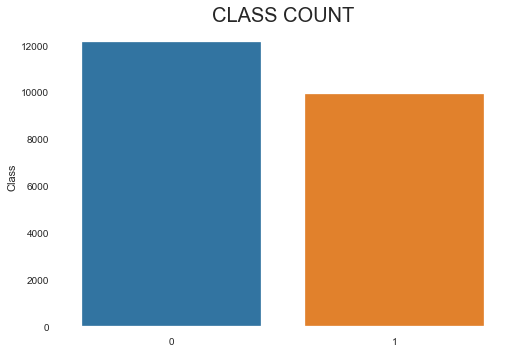

In [18]:
# Plot class distribution
classdf = data1['Class'].value_counts()
sns.barplot(np.arange(len(classdf)), classdf)
plt.title('CLASS COUNT', fontsize=20)
plt.show()

<AxesSubplot:ylabel='Sector'>

([<matplotlib.axis.XTick at 0x1eb6d5d4588>,
 [Text(0, 0, 'Financial Services'),
  Text(1, 0, 'Healthcare'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Industrials'),
  Text(4, 0, 'Consumer Cyclical'),
  Text(5, 0, 'Basic Materials'),
  Text(6, 0, 'Real Estate'),
  Text(7, 0, 'Energy'),
  Text(8, 0, 'Consumer Defensive'),
  Text(9, 0, 'Utilities'),
  Text(10, 0, 'Communication Services')])

Text(0.5, 1.0, 'SECTORS COUNT')

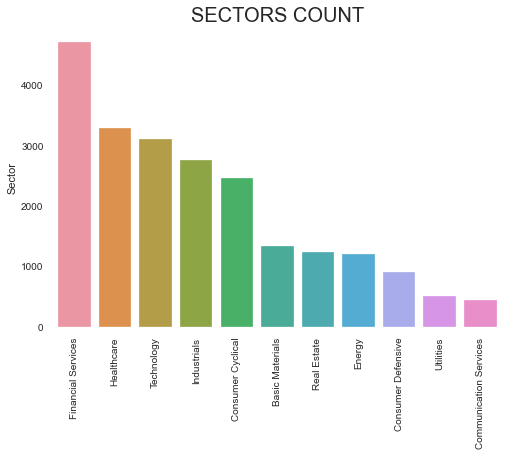

In [22]:
# Plot sector distribution
df_sector = data['Sector'].value_counts()
sns.barplot(np.arange(len(df_sector)), df_sector)
plt.xticks(np.arange(len(df_sector)), df_sector.index.values.tolist(), rotation=90)
plt.title('SECTORS COUNT', fontsize=20)
plt.show()

<AxesSubplot:xlabel='Year', ylabel='quickRatio'>

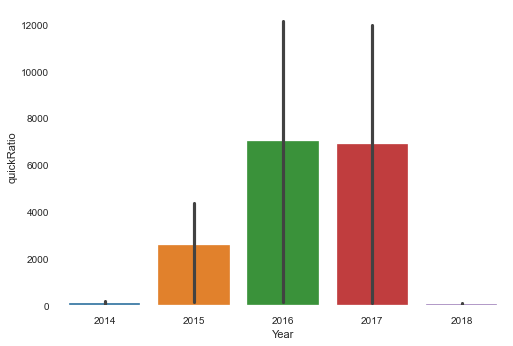

In [23]:
sns.barplot(x='Year', y='quickRatio',data=data1, estimator=np.std)

<AxesSubplot:>

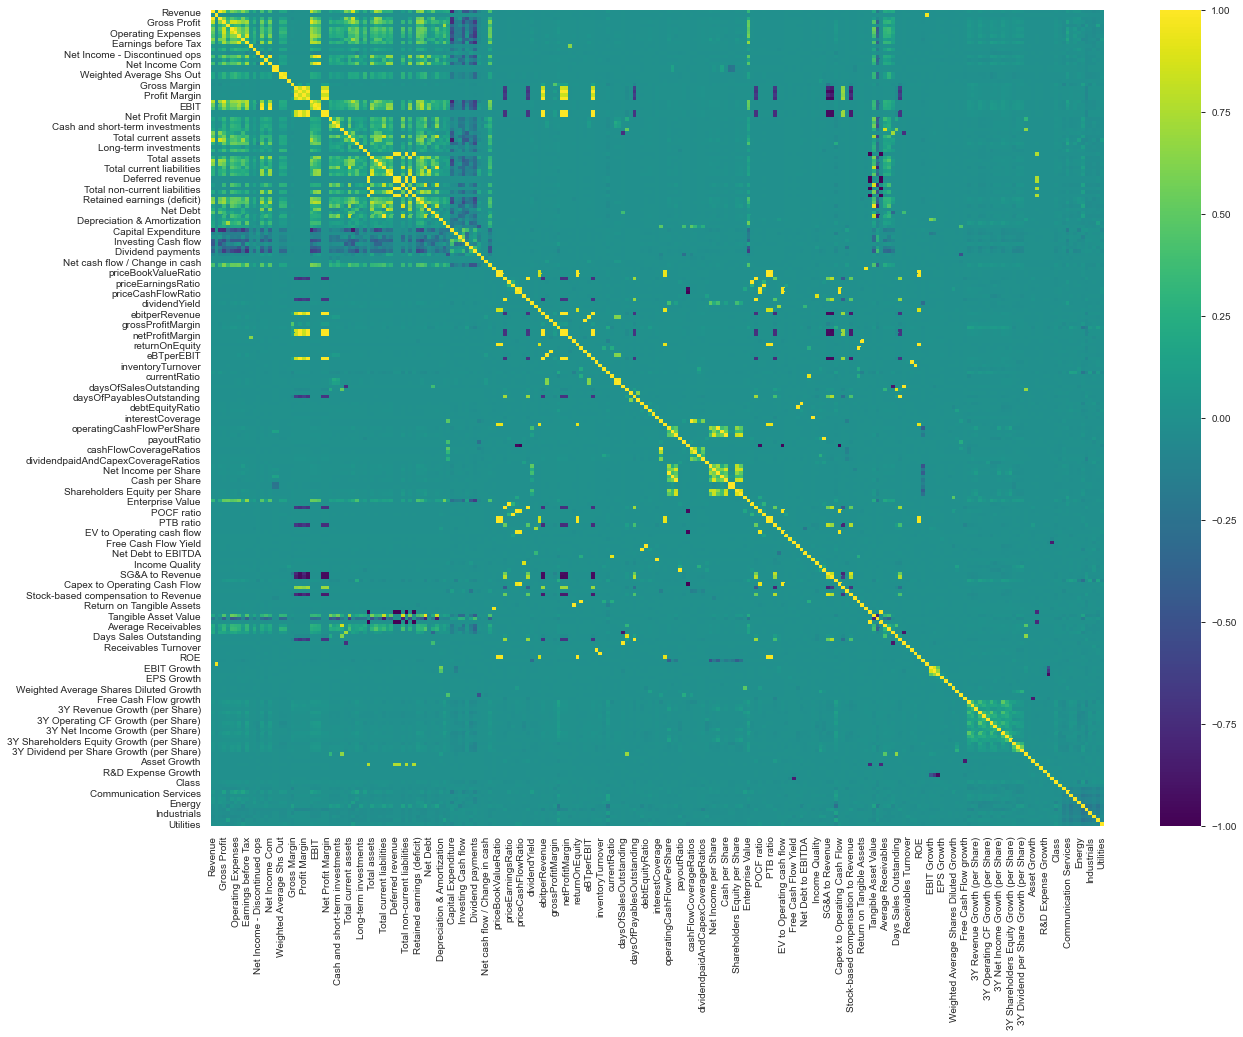

In [24]:
corr=data1.corr()
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(corr, annot=False, cmap='viridis', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

In [ ]:
corr.to_csv("Correlations.csv")

In [ ]:
data1.corr().unstack().sort_values().drop_duplicates()

<AxesSubplot:xlabel='Year', ylabel='PRICE_VAR%'>

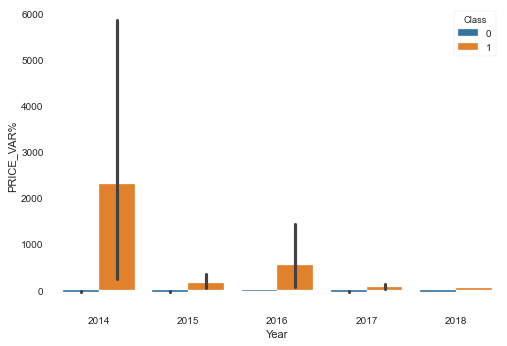

In [25]:
sns.barplot(x='Year',y='PRICE_VAR%',hue='Class',data=data1)

<Figure size 2160x360 with 0 Axes>

Text(0.5, 1.0, 'CONSUMER DEFENSIVE')

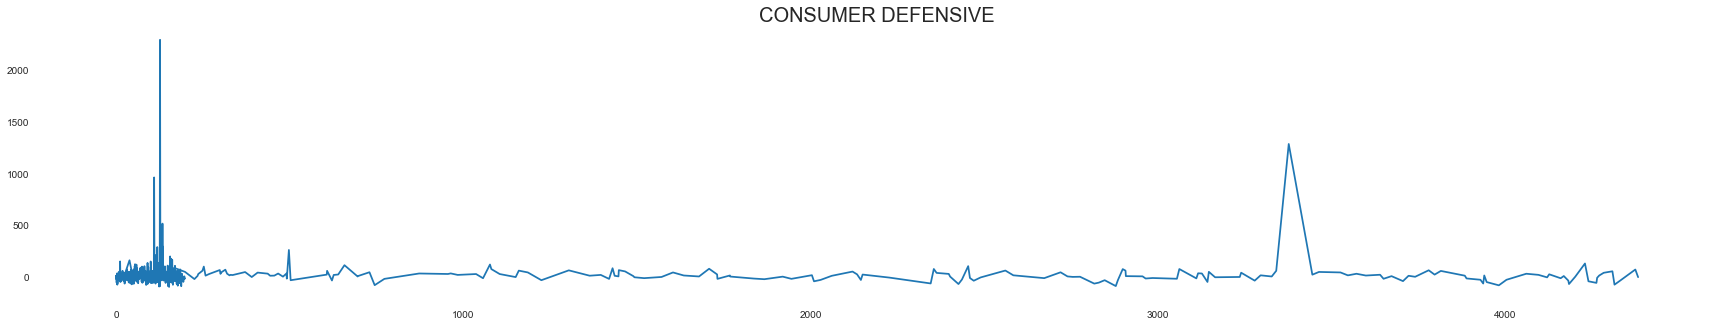

<Figure size 2160x360 with 0 Axes>

Text(0.5, 1.0, 'BASIC MATERIALS')

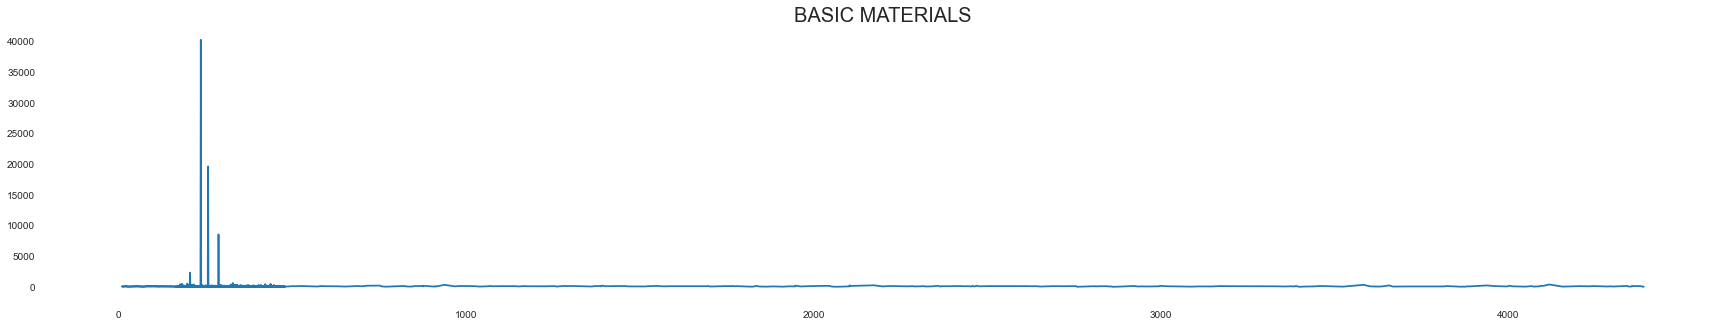

<Figure size 2160x360 with 0 Axes>

Text(0.5, 1.0, 'HEALTHCARE')

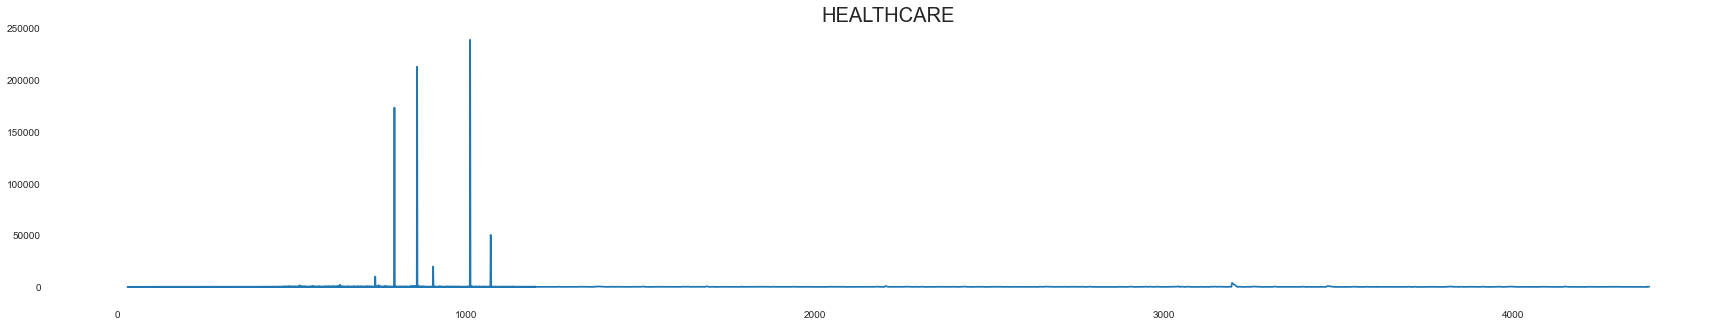

<Figure size 2160x360 with 0 Axes>

Text(0.5, 1.0, 'CONSUMER CYCLICAL')

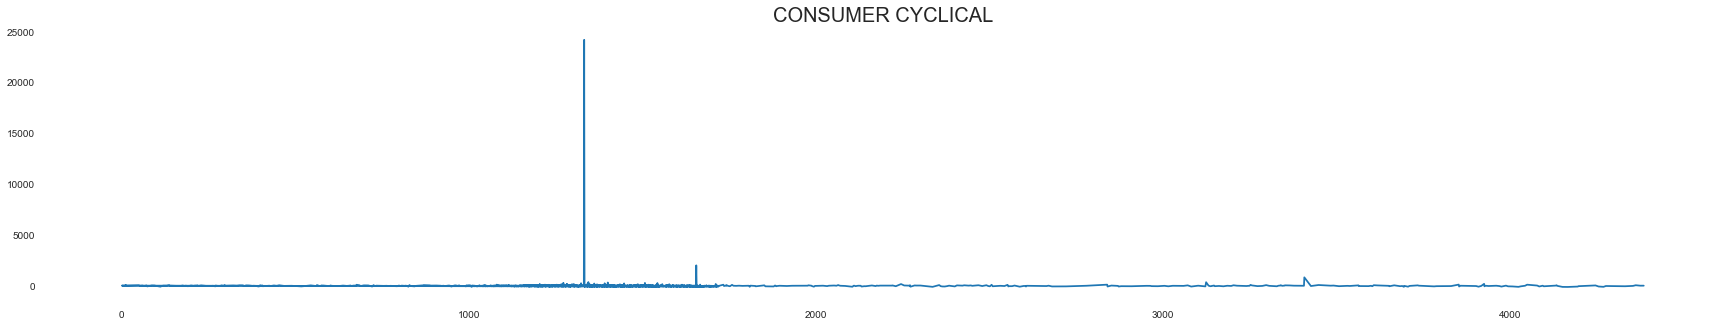

<Figure size 2160x360 with 0 Axes>

Text(0.5, 1.0, 'INDUSTRIALS')

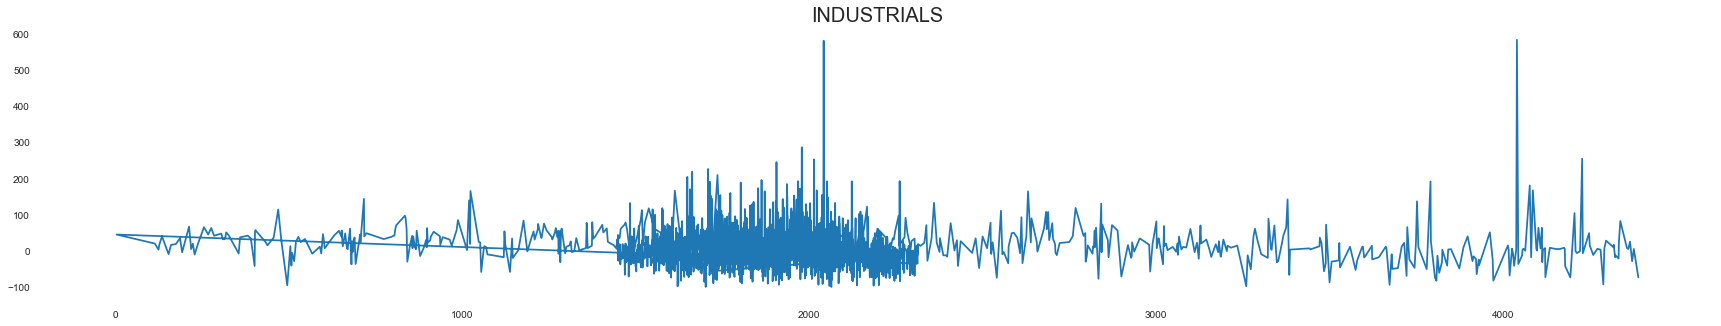

<Figure size 2160x360 with 0 Axes>

Text(0.5, 1.0, 'REAL ESTATE')

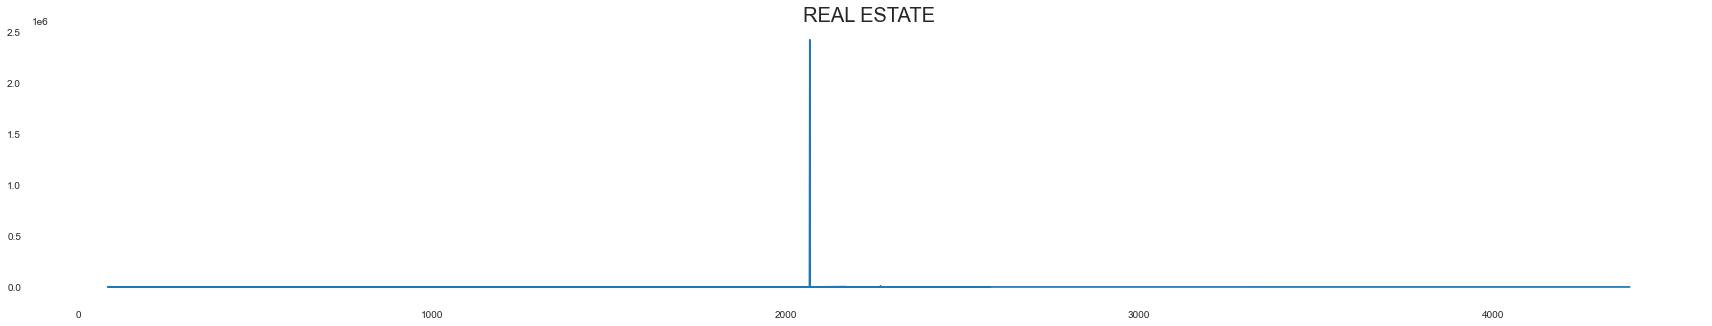

<Figure size 2160x360 with 0 Axes>

Text(0.5, 1.0, 'COMMUNICATION SERVICES')

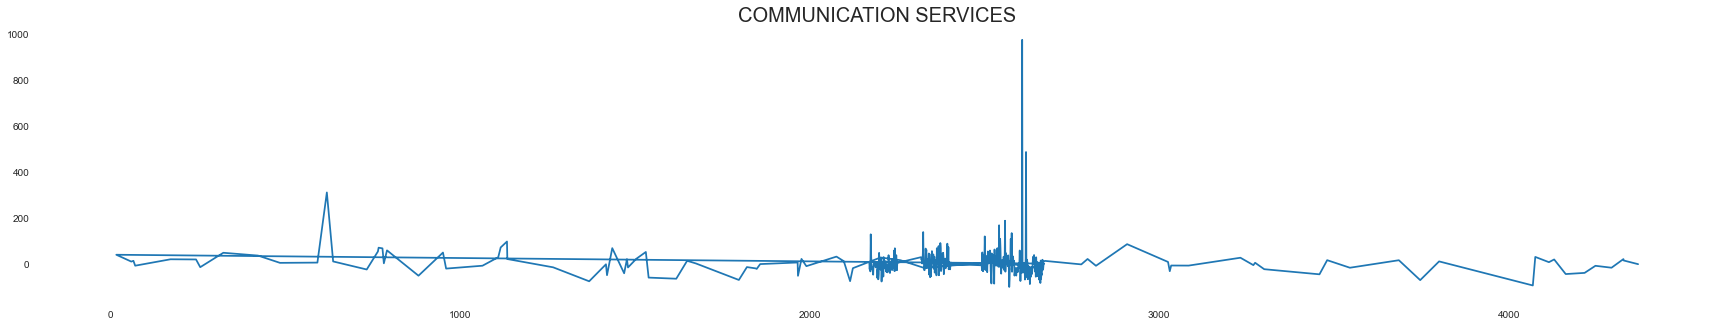

<Figure size 2160x360 with 0 Axes>

Text(0.5, 1.0, 'ENERGY')

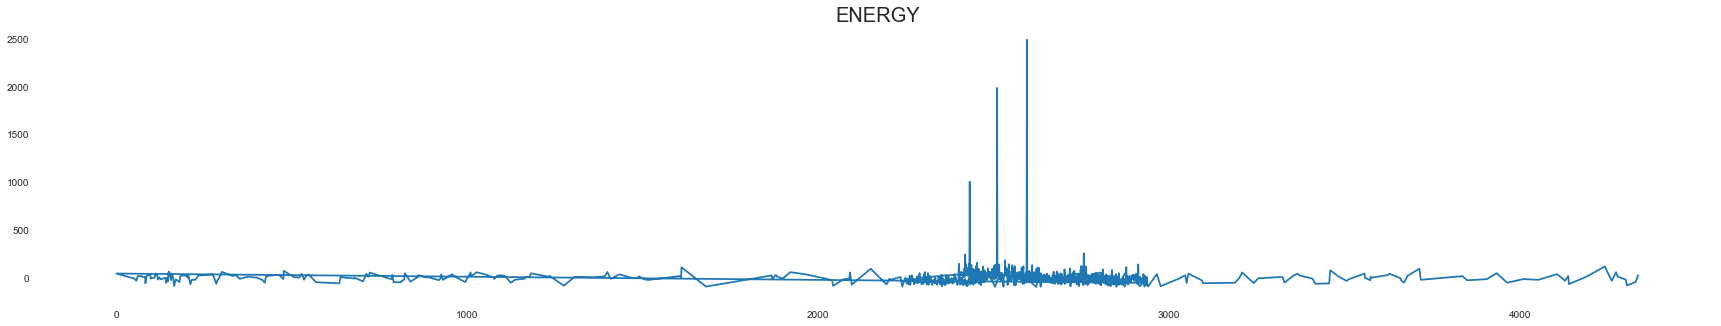

<Figure size 2160x360 with 0 Axes>

Text(0.5, 1.0, 'FINANCIAL SERVICES')

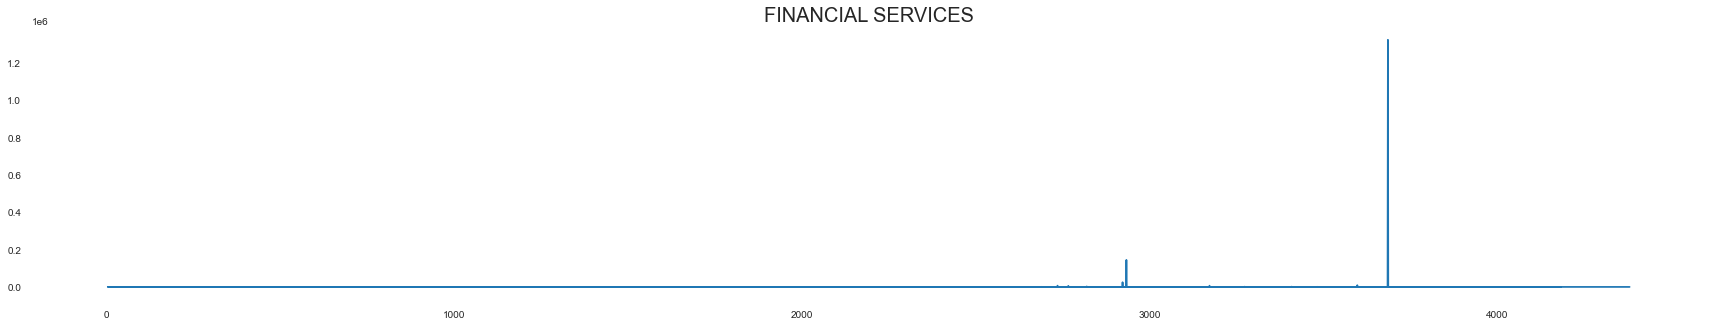

<Figure size 2160x360 with 0 Axes>

Text(0.5, 1.0, 'UTILITIES')

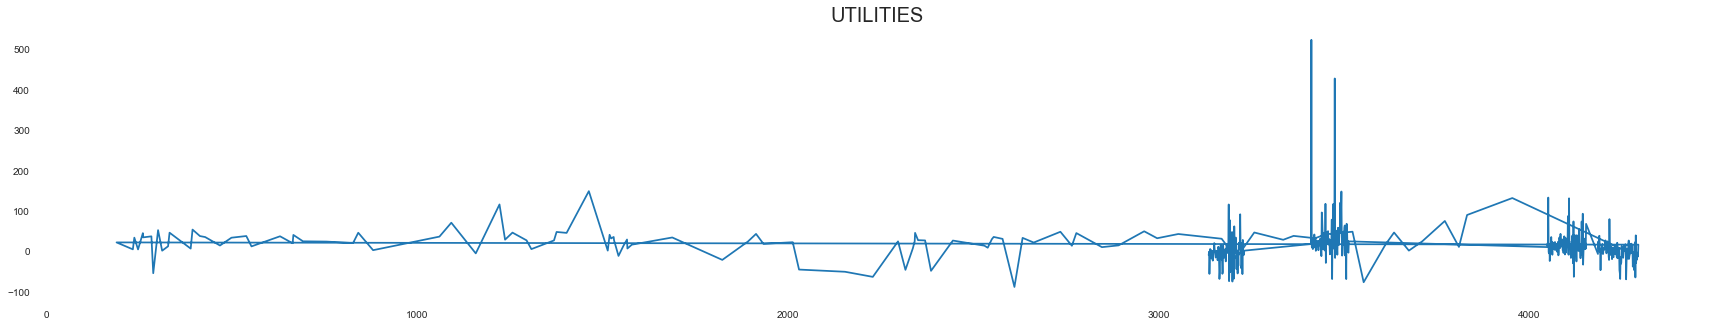

<Figure size 2160x360 with 0 Axes>

Text(0.5, 1.0, 'TECHNOLOGY')

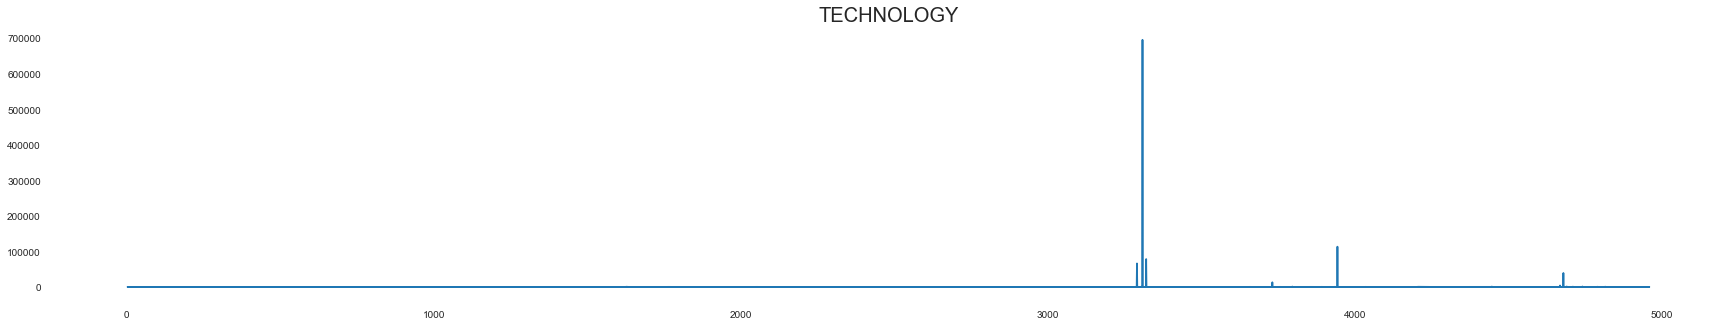

In [26]:
# Extract the columns we need in this step from the dataframe
dt = data.loc[:, ['Sector', 'PRICE_VAR%', 'Year']]

# Get list of sectors
sector_list = dt['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    
    temp = dt[dt['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['PRICE_VAR%'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

<AxesSubplot:xlabel='Year', ylabel='debtEquityRatio'>

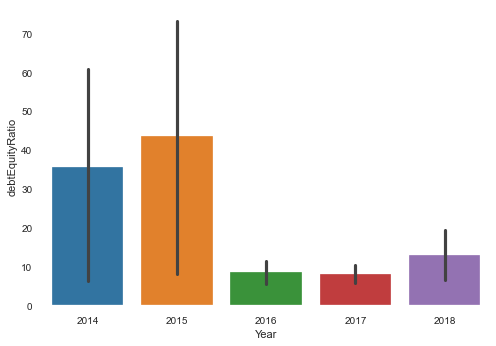

In [28]:
sns.barplot(x='Year', y='debtEquityRatio',data=data1, estimator=np.std)

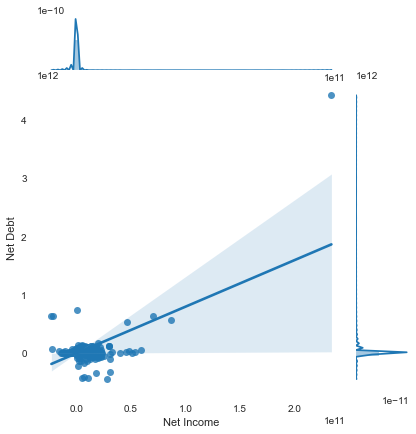

In [38]:
sns.jointplot(x='Net Income',y='Net Debt',data=data1,kind='reg')

In [27]:
all_year = set(data1['Year'].unique())
test_year = set(range(2017,2018,1))
train_year = all_year - test_year

len(train_year), len(test_year), len(all_year)

train = data1[data1['Year'].isin(train_year)]
test = data1[data1['Year'].isin(test_year)]

train['Class'].value_counts()

class_ratio = len(train[train['Class']==1]) / len(train.index)
class_ratio

len(test) / len(data1)
len(train) / len(data1)

(4, 1, 5)

1    10789
0     6328
Name: Class, dtype: int64

0.6303090494829702

0.224668206730987

0.775331793269013

In [34]:
data1.drop(['Year'], axis=1, inplace=True)
train.drop(['Year'], axis=1, inplace=True)
test.drop(['Year'], axis=1, inplace=True)

C:\Users\PRIYA\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
